Training and Tesiting by using CPU for dataset logos

Using device: cuda
Epoch [1/10], Loss: 53.4022, Test Loss: 21.7334, Accuracy: 52.50%
Epoch [2/10], Loss: 25.4385, Test Loss: 33.0352, Accuracy: 57.86%
Epoch [3/10], Loss: 12.3022, Test Loss: 39.9232, Accuracy: 48.93%
Epoch [4/10], Loss: 6.7935, Test Loss: 43.0579, Accuracy: 53.93%
Epoch [5/10], Loss: 2.0153, Test Loss: 58.0887, Accuracy: 54.46%
Epoch [6/10], Loss: 2.3019, Test Loss: 47.9226, Accuracy: 57.50%
Epoch [7/10], Loss: 0.3587, Test Loss: 56.5487, Accuracy: 55.71%
Epoch [8/10], Loss: 0.0686, Test Loss: 64.7488, Accuracy: 57.14%
Epoch [9/10], Loss: 0.0298, Test Loss: 66.4016, Accuracy: 56.96%
Epoch [10/10], Loss: 0.0166, Test Loss: 67.8474, Accuracy: 57.14%


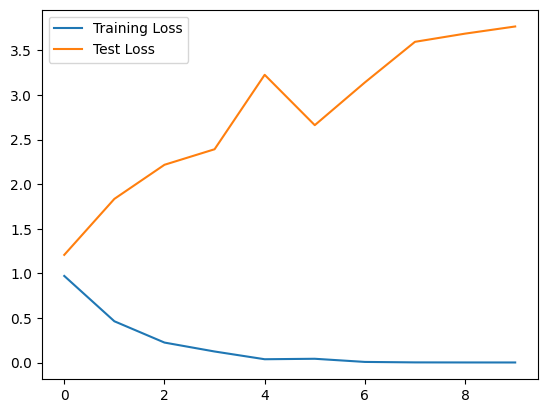

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Check if a GPU is available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Define transformations for the images (resize and normalize)
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalizing images to [-1, 1] range
])

# Load training and test datasets
train_data = datasets.ImageFolder("D:/KMUTT/Year 4th/ENE490 DL/Coding/Dataset/logos3/train", transform=transform)
test_data = datasets.ImageFolder("D:/KMUTT/Year 4th/ENE490 DL/Coding/Dataset/logos3/test", transform=transform)

# Create data loaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

num_classes=6

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 16 * 16, 128)  # Assuming image size is 128x128
        self.fc2 = nn.Linear(128, num_classes) 

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 128 * 16 * 16)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
model = SimpleCNN(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    # Evaluate on test set
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_losses.append(test_loss / len(test_loader))
    accuracy = 100 * correct / total

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%')

# Plot training and test loss
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()


Loss Function Plot

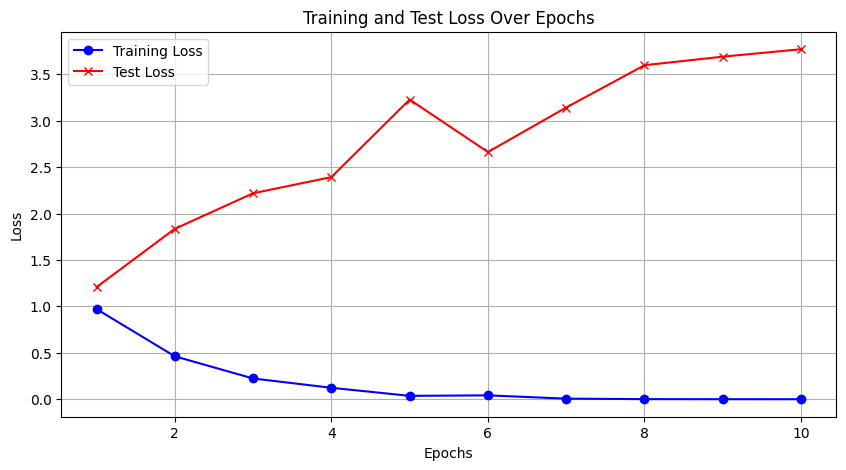

In [5]:
import matplotlib.pyplot as plt

def plot_loss(train_losses, test_losses):
    """
    Function to plot the training and test loss over epochs.
    
    Args:
    - train_losses (list): A list of training loss values.
    - test_losses (list): A list of test loss values.
    """
    epochs_range = range(1, len(train_losses) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(epochs_range, train_losses, label='Training Loss', color='blue', marker='o')
    plt.plot(epochs_range, test_losses, label='Test Loss', color='red', marker='x')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Test Loss Over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(train_losses, test_losses)

Training and Testing by using GPU CUDA

Dataset => Tumor

Using device: cuda
Epoch [1/10], Loss: 78.0606, Test Loss: 27.2831, Accuracy: 36.55%
Epoch [2/10], Loss: 49.0802, Test Loss: 29.3945, Accuracy: 51.02%
Epoch [3/10], Loss: 33.8315, Test Loss: 27.7639, Accuracy: 49.75%
Epoch [4/10], Loss: 20.7514, Test Loss: 49.3344, Accuracy: 68.53%
Epoch [5/10], Loss: 13.5348, Test Loss: 55.6044, Accuracy: 67.77%
Epoch [6/10], Loss: 8.4401, Test Loss: 61.9698, Accuracy: 69.29%
Epoch [7/10], Loss: 6.7275, Test Loss: 69.4196, Accuracy: 73.86%
Epoch [8/10], Loss: 3.4684, Test Loss: 87.1894, Accuracy: 74.62%
Epoch [9/10], Loss: 2.5628, Test Loss: 102.2209, Accuracy: 74.11%
Epoch [10/10], Loss: 1.4196, Test Loss: 108.7521, Accuracy: 74.62%


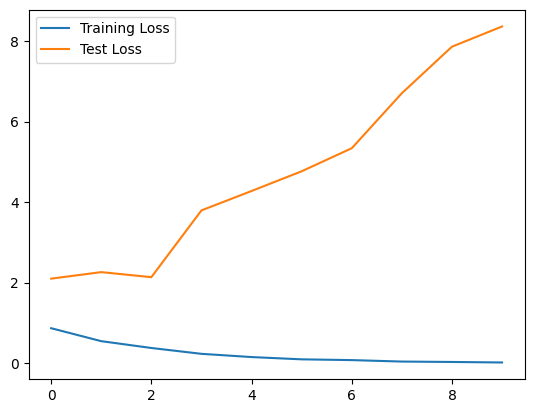

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Check if a GPU is available and set the device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Define transformations for the images (resize and normalize)
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalizing images to [-1, 1] range
])

# Load training and test datasets
train_data = datasets.ImageFolder("D:/KMUTT/Year 4th/ENE490 DL/Coding/Dataset/brain_tumor_dataset/Brain Tumor Classification/Training", transform=transform)
test_data = datasets.ImageFolder("D:/KMUTT/Year 4th/ENE490 DL/Coding/Dataset/brain_tumor_dataset/Brain Tumor Classification/Testing", transform=transform)

# Create data loaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

num_classes=4

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 16 * 16, 128)  # Assuming image size is 128x128
        self.fc2 = nn.Linear(128, num_classes)  # Two classes (change based on your number of classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 128 * 16 * 16)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
model = SimpleCNN(num_classes).to(device)  # Move model to GPU if available
criterion = nn.CrossEntropyLoss().to(device)  # Move loss function to GPU if available
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Move images and labels to GPU if available

        optimizer.zero_grad()
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    # Evaluate on test set
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)  # Move images and labels to GPU if available
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_losses.append(test_loss / len(test_loader))
    accuracy = 100 * correct / total

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%')

# Plot training and test loss
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()


Training and Testting by CUDA with the softmax function on last layer

Using device: cuda
Epoch [1/10], Loss: 59.5128, Test Loss: 26.6039, Accuracy: 53.04%
Epoch [2/10], Loss: 28.7970, Test Loss: 28.6050, Accuracy: 59.64%
Epoch [3/10], Loss: 16.8932, Test Loss: 31.0839, Accuracy: 55.00%
Epoch [4/10], Loss: 11.1734, Test Loss: 36.6731, Accuracy: 58.39%
Epoch [5/10], Loss: 3.1060, Test Loss: 49.7013, Accuracy: 57.68%
Epoch [6/10], Loss: 0.6700, Test Loss: 62.7499, Accuracy: 58.39%
Epoch [7/10], Loss: 0.4448, Test Loss: 67.2808, Accuracy: 56.61%
Epoch [8/10], Loss: 1.3106, Test Loss: 60.6104, Accuracy: 53.75%
Epoch [9/10], Loss: 1.7767, Test Loss: 64.4743, Accuracy: 51.61%
Epoch [10/10], Loss: 2.1586, Test Loss: 48.7400, Accuracy: 59.64%


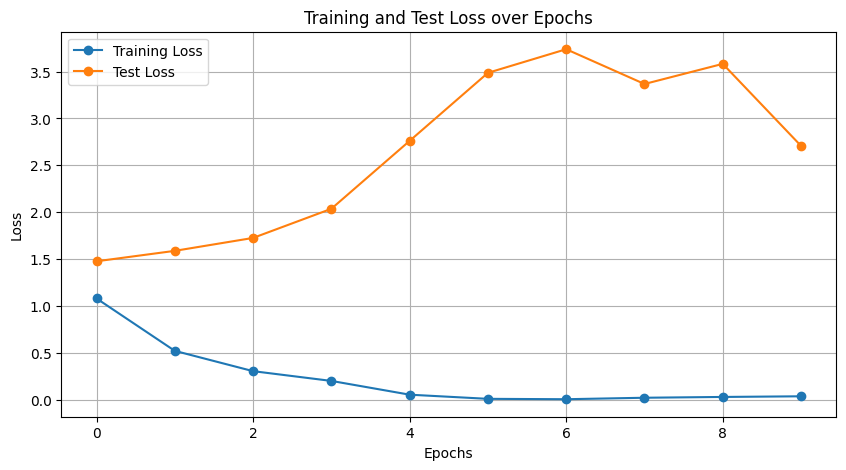

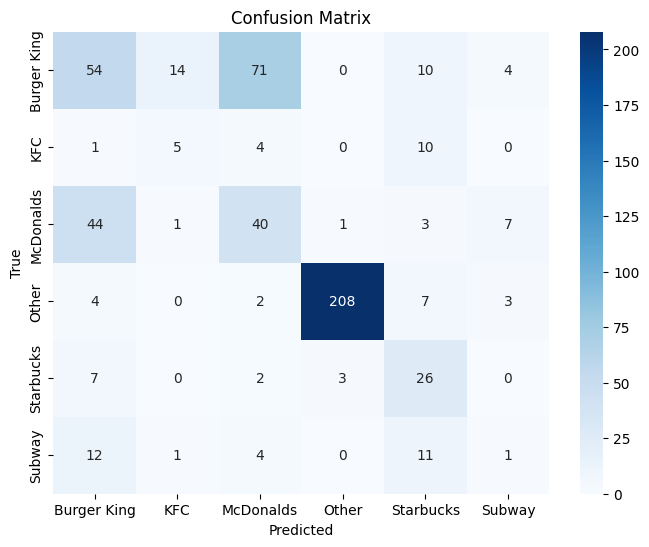

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Check if a GPU is available and set the device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Define transformations for the images (resize and normalize)
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalizing images to [-1, 1] range
])

# Load training and test datasets
train_data = datasets.ImageFolder("D:/KMUTT/Year 4th/ENE490 DL/Coding/Dataset/logos3/train", transform=transform)
test_data = datasets.ImageFolder("D:/KMUTT/Year 4th/ENE490 DL/Coding/Dataset/logos3/test", transform=transform)

# Create data loaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

num_classes = 6

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 16 * 16, 128)  # Assuming image size is 128x128
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 128 * 16 * 16)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)  # Return raw logits
        return x

# Initialize the model, loss function, and optimizer
model = SimpleCNN(num_classes).to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    # Evaluate on test set
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            # Apply softmax to get probabilities
            probabilities = torch.softmax(outputs, dim=1)  
            _, predicted = torch.max(probabilities, 1)  # Use predicted classes

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Store labels and predictions for confusion matrix
            all_labels.extend(labels.cpu().numpy())  # Convert to CPU numpy
            all_preds.extend(predicted.cpu().numpy())  # Convert to CPU numpy

    test_losses.append(test_loss / len(test_loader))
    accuracy = 100 * correct / total

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%')

# Plot training and test loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss', marker='o')
plt.plot(test_losses, label='Test Loss', marker='o')
plt.title('Training and Test Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Get class names from the dataset
class_names = train_data.classes

# Plot the confusion matrix
plot_confusion_matrix(cm, class_names)


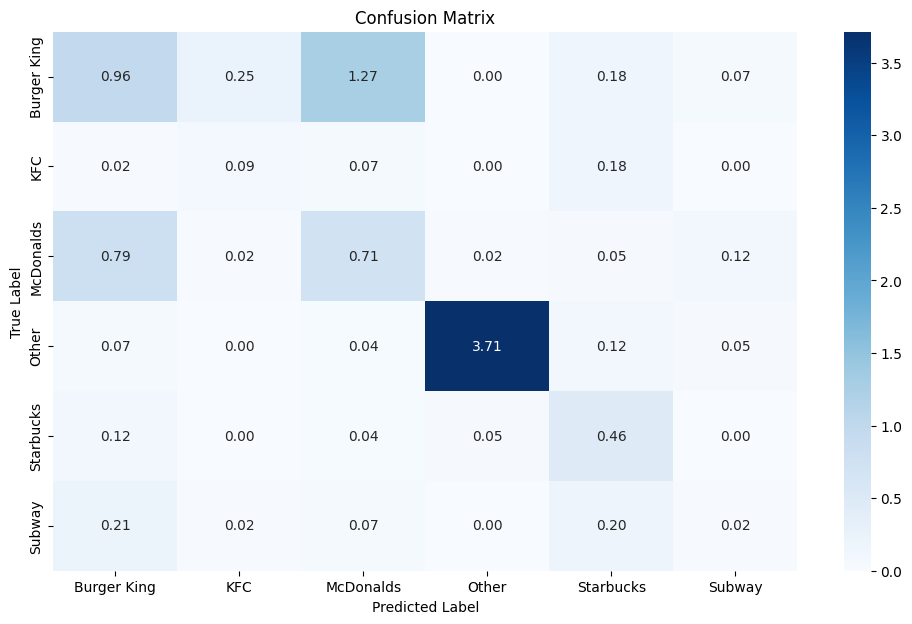

<Figure size 640x480 with 0 Axes>

In [16]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Ensure the model is in evaluation mode
model.eval()

# Initialize lists to store predictions and true labels
y_pred = []
y_true = []

# Iterate over the test data
with torch.no_grad():
    for inputs, labels in test_loader:
        # Move inputs and labels to the GPU if available
        inputs, labels = inputs.to(device), labels.to(device)

        # Get model predictions
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        # Move predictions and true labels back to the CPU for confusion matrix computation
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Get class names dynamically from the dataset
class_names = train_data.classes

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix) * 10, index=[i for i in class_names],
                     columns=[i for i in class_names])

# Plot confusion matrix
plt.figure(figsize=(12, 7))
sns.heatmap(df_cm, annot=True, fmt=".2f", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Optionally save the figure
plt.savefig('./ConfMatrix/confusion_CNN_L5.png')
